In this notebook , we are trying to detect fraud when we do not have any label . Therefore, we need to use unsupervised modeling techniques .
To check fraud we need to detect suspicious data.  Probably we need to look at the describtion of the data and its normality .
So we need to put custoemrs in different segment. Then look at the transcation's behaviours.You have to create a seprate model as wes should not  detect suscpicious behaviour within a segment.
The dataset I am using here was downloaded from Datacamp database.


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("banksim1.csv")

In [3]:
df.shape

(7200, 20)

In [4]:
# Display the first 5 rows
df.head().T


,0,1,2,3,4
Unnamed: 0,171915,426989,310539,215216,569244
age,3,4,3,4,2
gender,F,F,F,M,M
amount,49.71,39.29,18.76,13.95,49.87
fraud,0,0,0,0,0
es_transportation,1,0,1,1,1
es_health,0,1,0,0,0
es_hyper,0,0,0,0,0
es_food,0,0,0,0,0
es_wellnessandbeauty,0,0,0,0,0


In [5]:
#Need to delete unnamed column
df = df.drop('Unnamed: 0', axis=1)



In [6]:
df.describe()
df.columns

Index(['age', 'gender', 'amount', 'fraud', 'es_transportation', 'es_health',
       'es_hyper', 'es_food', 'es_wellnessandbeauty', 'es_fashion',
       'es_hotelservices', 'es_sportsandtoys', 'es_barsandrestaurants',
       'es_home', 'es_tech', 'es_contents', 'es_otherservices', 'es_travel',
       'es_leisure'],
      dtype='object')

You can see  that fraud is more prevalent in in travel, leisure , sports and hotel  related transactions.

In [7]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = df.loc[df.fraud == 1] 
df_non_fraud = df.loc[df.fraud == 0]

In [8]:
classes = {0:'Not Fraud', 1:'Fraud'}
print(df.fraud.value_counts().rename(index = classes))

Not Fraud    7000
Fraud         200
Name: fraud, dtype: int64


In [9]:
import matplotlib.pyplot as plt
# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

 it is difficult to see the full distribution as it is difficult to see the full distribution 

However, we can see that the fraudulent transactions tend to be on the larger side relative to normal obervations.
This is good news, as it helps us later in detecting fraud from non-fraud. 
Next,we're going to implement a clustering model to distinguish between normal and abnormal transactions, when the fraud labels are no longer available.

In [10]:
#We need data preparation done before we go further
#assign a number to gender
df.gender=df.gender.map(lambda x:0 if x=='M' else 1)

The data is imbalanced so we need to use SMOTE technique to tackle this issue first

In [11]:
X=df.drop('fraud',axis=1)
y=df.fraud.values
len(y)

7200

In [12]:
# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(len(y))) * 100

# Print the percentage: this is our "natural accuracy"or baseline by doing nothing
print(percentage)


97.22222222222221


we would be correct in 97.22% of the cases. So now you understand, that if we get an accuracy of less than this number, our model does not actually add any value in predicting how many cases are correct. Let's see how random forest does in predicting fraud in our data.

In [13]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss = StandardScaler()

# use the "fit_transform" function to standardize the X design matrix
Xs = ss.fit_transform(X)
#print(Xs.values)
print(Xs)
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(Xs, y,train_size=0.8, random_state=2)

[[ 1.10959230e-02  8.97449859e-01  3.13766315e-01 ... -3.72937070e-02
  -5.00626174e-02 -4.25302420e-02]
 [ 7.57737469e-01  8.97449859e-01  5.69043625e-02 ... -3.72937070e-02
  -5.00626174e-02 -4.25302420e-02]
 [ 1.10959230e-02  8.97449859e-01 -4.49177777e-01 ... -3.72937070e-02
  -5.00626174e-02 -4.25302420e-02]
 ...
 [-1.48218717e+00  8.97449859e-01  4.90960841e+00 ... -3.72937070e-02
   1.99749844e+01 -4.25302420e-02]
 [-1.48218717e+00 -1.11426838e+00  4.90960841e+00 ... -3.72937070e-02
  -5.00626174e-02 -4.25302420e-02]
 [ 7.57737469e-01  8.97449859e-01  4.90960841e+00 ... -3.72937070e-02
  -5.00626174e-02 -4.25302420e-02]]


C:\Users\samra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
from imblearn.over_sampling import SMOTE
# Define the resampling method and Create the resampled feature set
X_resampled, y_resampled = SMOTE(kind='regular').fit_sample(X_train,y_train)

In [15]:
print(pd.value_counts(pd.Series(y_resampled)))

1    5602
0    5602
dtype: int64


## Kmeans clustering

In [16]:
#we use kmeans which uses the distance to cluster centroid
# Import the packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

For ML algorithms using distance based metrics, it is important to always scale your data, as features using different scales will distort your results. K-means uses the Euclidian distance to assess distance to cluster centroids, therefore you first have to scale your data before continuing to implement the algorithm.

In [17]:

# Transform df into a numpy array-
X = np.array(X).astype(np.float)

# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)

 For fraud detection, K-means clustering is straightforward to implement and relatively powerful in predicting suspicious cases. 
    It is a good algorithm to start with when working on fraud detection problems. However, fraud data is oftentimes very large, especially when you are working with transaction data. 
    MiniBatch K-means is an efficient way to implement K-means on a large dataset, which we will use in this exercise.

Next,we need to figure our what the right number of clusters to use is. it is important to get the number of clusters right, especially when you want to use the outliers of those clusters as fraud predictions. To decide which amount of clusters you're going to use, let's apply the Elbow method and see what the optimal number of clusters should be based on this method.

In [18]:
# Define the range of clusters to try
clustno = range(1,10)


In [19]:
# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans
# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

In [20]:
# Obtain the score for each model
score = [kmeans[i].fit(X_resampled).score(X_resampled) for i in range(len(kmeans))]

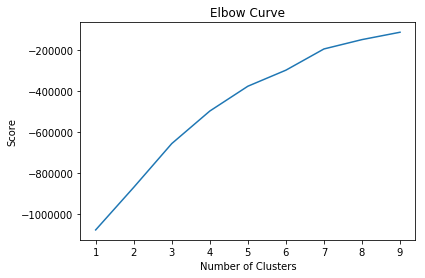

In [21]:
# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

As you see the optimal number of clusters should probably be around 3 clusters as that is where the elbow is in the curve.
we use this  as our baseline model, and see how well this does in detecting fraud

Detecting outliers
We need to detect outiers inorder as they may signal fraud.The fraudulent transactions are typically flagged as the observations that are furthest aways from the cluster centroid


In [22]:
#the first step is train_test. we have done it already!!
    #from sklearn.model_selection import train_test_split
    # Split the data into training and test set
    #X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_resampled)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
predict = np.array(dist)
predict[dist >= np.percentile(dist, 95)] = 1
predict[dist < np.percentile(dist, 95)] = 0
#Now that we have the predictions from our kmeans model, let's check how it compares to the actual labels

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix
#Checking the model results
# Obtain the ROC score
print(roc_auc_score(y_test,predict))

0.658185162477008


In [24]:
print(confusion_matrix(y_test,predict))
#By lowering the threshold for cases flagged as fraud, we mayflag more cases overall but thereby also get more false positives.

[[1341   57]
 [  27   15]]


The model predicts 72 cases of fraud, out of which 14 are actual fraud. 
We have  58 false positives which is not bad(precision=TP/tp+fp=14/14+58=.19). 
We have not caught 28 cases of actual fraud (recall=TP/TP+FN=14/14+28=.33). 
Lets try to improve these scores.

In [25]:
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1398
          1       0.21      0.36      0.26        42

avg / total       0.96      0.94      0.95      1440



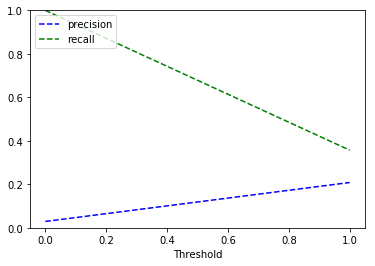

In [26]:
from sklearn.metrics import precision_recall_curve
prec, rec, tre = precision_recall_curve(y_test, predict )

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()
#IT Seems when precision decreases ,r eacll increases. 

In [27]:
from sklearn.metrics import silhouette_score
k_labels = kmeans.labels_
print(("Silhouette Coefficient: %0.3f" % silhouette_score(X_resampled, k_labels)))
#let's see if we can come up with a better result with DBSCAN

Silhouette Coefficient: 0.362


 The best value is 1 and the worst value is -1. 

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.


# DBSCAN Method

the good feature of this method is we don't need  to predefine the number of cluster.The algorithm here finds core sample of high density and expands cluster from them. this works well on data which have clusters of similar density. we can detect smallest group as fraud  of clusters instead using outliers as fraud.

It perfoms well on weird shap data. 
we need to assign minimum number of samples in cluster and maximum distance between points within clusters.
#higher computational cost

### Implementing DBscan

In [28]:
from sklearn.cluster import DBSCAN

In [48]:
# 'eps' is the max distance between two samples in order for them to be considered in the some cluster.
# min_samples = Minimum number of samples required for a cluster to be considered a cluster.
# Initialize and fit the DBscan model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(Xs)#we put eps:.9 and the number of samples 


### Check out the assigned cluster labels

In [49]:
#Check out the assigned cluster labels, Using the .labels_ command on our DBSCAN class
labels = db.labels_  
print(list(labels))

[0, 1, 0, 2, 2, 3, 0, 0, 2, 0, 2, 1, 4, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 5, 0, 2, 6, 2, 1, -1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 7, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, -1, 2, 2, 2, 0, 2, 0, 15, -1, 2, 0, 0, 2, 7, 4, 2, 1, 0, 0, 0, 2, 0, 8, -1, 0, 0, 3, 0, 0, 0, 0, 10, 2, 2, 0, 2, 0, 0, 2, 9, 10, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 8, 10, 0, -1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 4, 0, 0, 0, 2, 2, 2, 6, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 4, 2, 2, 2, 5, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 14, 2, 2, 7, 2, 0, 2, 2, 0, 0, 2, 0, 15, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 7, 2, 2, 2, 11, 0, 0, 0, 0, 2, 0, 0, 2, 5, 0, 0, 2, 0, 2, 2, 14, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 8, 0, 0, 2, 4, 0, 0, 4, 2, 2, 2, 0, 0, 2, 0, 0, 1, -1, -1, 0, 2, 2, 6, 0, 2, 0, 0, 2, 2, 5, 2, 2, 2, 0, 2, -1, 2, 2, 0, 6, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 4, 0, 2, 2, 0, 0, 2, 8, 0, 0, 2, 0, 2, 0, 2, 5, 2, 2, 2, 2,

In [50]:
# how many clusters do we have?
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)
#The number of clusters is much higher than with K-means. For fraud detection this is for now OK, as we are only interested in the smallest clusters, since those are considered as abnormal. Now let's have a look at those clusters and decide which one to flag as fraud

16


### Evaluate the DBSCAN clusters

In [52]:
#Check the silhouette score.
from sklearn.metrics import silhouette_score

print(("Silhouette Coefficient: %0.3f" % silhouette_score(Xs, labels)))
#better than kmeans results

Silhouette Coefficient: 0.431


In [53]:
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score


In [54]:
print(('Estimated number of clusters: %d' % n_clusters_))
print(("Homogeneity: %0.3f" % homogeneity_score(y, labels)))
print(("Completeness: %0.3f" % completeness_score(y, labels)))
print(("V-measure: %0.3f" % v_measure_score(y, labels)))

Estimated number of clusters: 16
Homogeneity: 0.611
Completeness: 0.054
V-measure: 0.099


In [55]:
import numpy as np
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[db.core_sample_indices_] = True 
print(list(core_samples))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, T

### Assessing smallest clusters

In [56]:


dbscn = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(Xs)
labels2 = dbscn.labels_ 
n2_clusters_ = len(set(labels2)) - (1 if -1 in labels2 else 0)
#We first need to figure out how big the clusters are, and filter out the smallest.
#Next, we're going to take the smallest ones and flag those as fraud
#last,we'll check with the original labels whether this does actually do a good job in detecting fraud.
counts2 = np.bincount(labels2[labels2 >= 0])

# Print the result
print(counts2)


[3261  139 2714   51  175  118  113   40   74   18   36   36   71   25
   43   20]


In [65]:
# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts2)[:3]

# Print the results 
print("The smallest clusters are clusters:")      
print(smallest_clusters)

The smallest clusters are clusters:
[ 9 15 13]


In [66]:
# Print the counts of the smallest clusters only
print("Their counts are:")      
print(counts2[smallest_clusters])

Their counts are:
[18 20 25]


So now we know which smallest clusters you could flag as fraud. If you were to take more of the smallest clusters, you cast your net wider and catch more fraud, but most likely also more false positives. It is up to the fraud analyst to find the right amount of cases to flag and to investigate.

In [67]:
#Now,we check the results with the actual labels.
# Create a dataframe of the predicted cluster numbers and fraud labels

#In this case, WE'll use the fraud labels to check your model results.
df = pd.DataFrame({'clusternr':labels2,'fraud':y})

# Create a condition flagging fraud for the smallest clusters 
df['predicted_fraud'] = np.where((df['clusternr']==9) | (df['clusternr']==13) | (df['clusternr']==15), 1, 0)

# Run a crosstab on the results 
print(pd.crosstab(df.fraud, df.predicted_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6969  31
1               168  32


The good thing is:  Since we only took the three smallest clusters, by definition we flag less cases of fraud, so we catch less but also have less false positives. However, we are missing quite a lot of fraud cases. Increasing the amount of smallest clusters our flag could improve that, at the cost of more false positives of course. 
    Probabaly, we can improve fraud detection models by including text analysis.

|we need to think about how to deal with the imablanced data in DBSCAN as dbscan does not allow us to predict X_test. I will investigate further.